# 1. Introduction

#### A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

#### 1.Which variables are significant in predicting the price of a car

#### 2.How well those variables describe the price of a car

# 2. Business Goal

#### We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# 3. Analysis

### 3.1 Step - 1 Reading and Understanding the Data

In [540]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [541]:
df = pd.read_csv("CarPrice_Assignment.csv")

In [542]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [543]:
## Understanding the dataframe
df.shape

(205, 26)

In [544]:
# Information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [545]:
# Description of the data
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### 3.2 Step 2 - Cleaning the data

In [546]:
#Checking for missing Values 
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [547]:
# Checking for duplicate values 
dup = df.duplicated().sum()
dup

0

In [548]:
# dropping car_ID based on business knowledge

df_auto = df.drop('car_ID',axis=1)
df_auto

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [549]:
# Remove trailing whitespace from 'CarName' values
df_auto['CarName'] = df_auto['CarName'].str.strip()

# Split 'CarName' column on space character and expand into separate columns
df_split = df_auto['CarName'].str.split(' ', expand=True)

# Assign the split columns back to the DataFrame
df_auto[['CarName']] = df_split[[0]] 

In [550]:
df_auto

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [551]:
# Renaming the typo errors in Car Company names

df_auto['CarName'] = df_auto['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [552]:
# Segregation of Numerical and Categorical Variables/Columns

cat_col = df_auto.select_dtypes(include=['object']).columns
num_col = df_auto.select_dtypes(exclude=['object']).columns
df_cat = df_auto[cat_col]
df_num = df_auto[num_col]

In [553]:
df_cat

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [554]:
df_num

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


### 3.3 Step 3 - Visualizing the data

#### Identifying if some predictors directly have a strong association with the outcome variable price

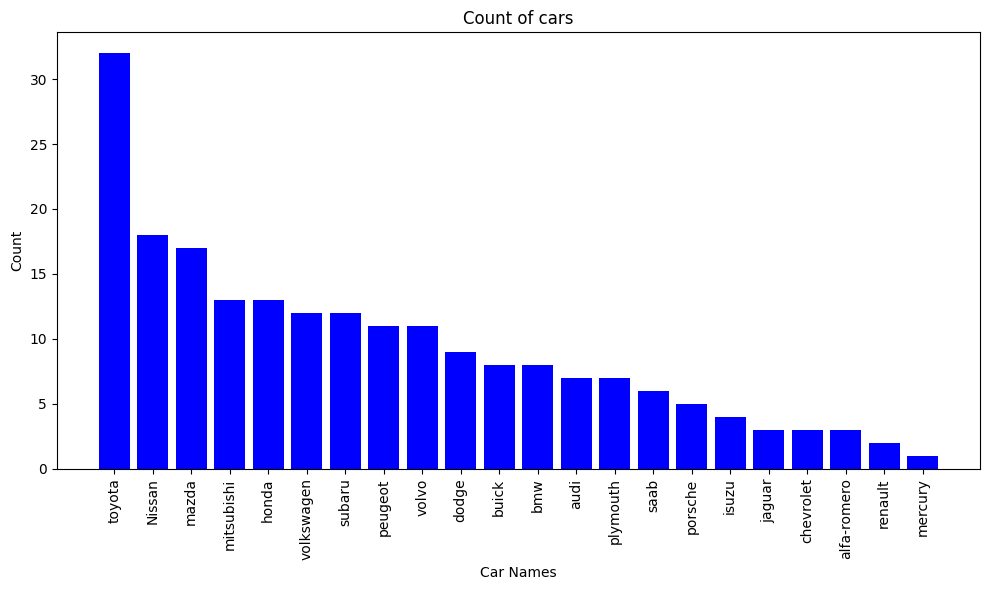

 Insights: Toyota seems to be the most Favoured car and Mercury to be the least.


In [555]:
# Visualizing the different car names available

car_counts = df_auto['CarName'].value_counts()
car_count_df = pd.DataFrame(car_counts)
car_count_df.reset_index(inplace=True)
car_count_df.columns = ['CarName','Count']


plt.figure(figsize=(10,6))
plt.bar(car_count_df['CarName'],car_count_df['Count'],color = 'blue')
plt.xlabel('Car Names')
plt.ylabel('Count')
plt.title('Count of cars')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

print(f" Insights: Toyota seems to be the most Favoured car and Mercury to be the least.")

#### Visualising the distribution of Car Prices

 Insight: The plot seems to be right skewed, and the price of almost cars is less than 18000.


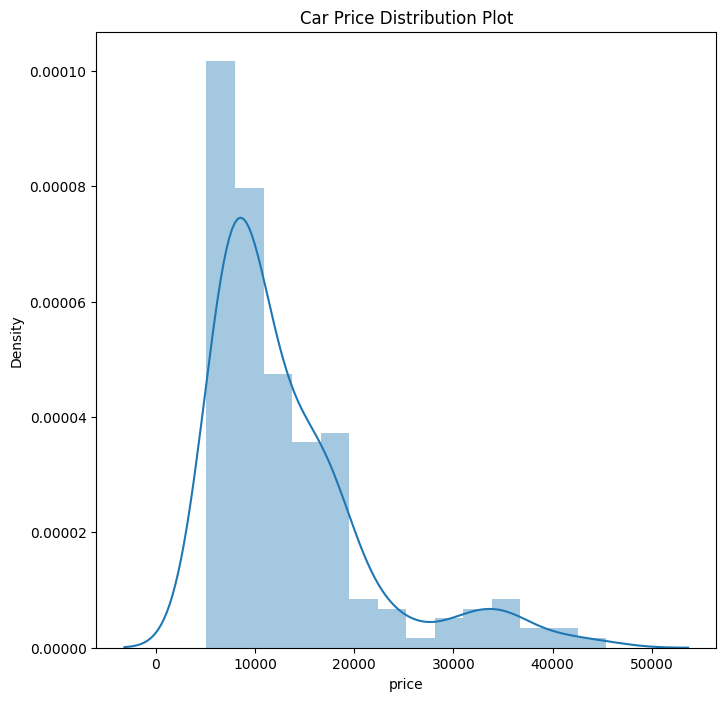

In [556]:
plt.figure(figsize=(8,8))
plt.title('Car Price Distribution Plot')
sns.distplot(df_auto['price'])

print(f" Insight: The plot seems to be right skewed, and the price of almost cars is less than 18000.")

### Visualizing numeric variables 

Insights: carwidth , carlength, curbweight ,enginesize ,horsepowerseems to have a positive correlation with price.


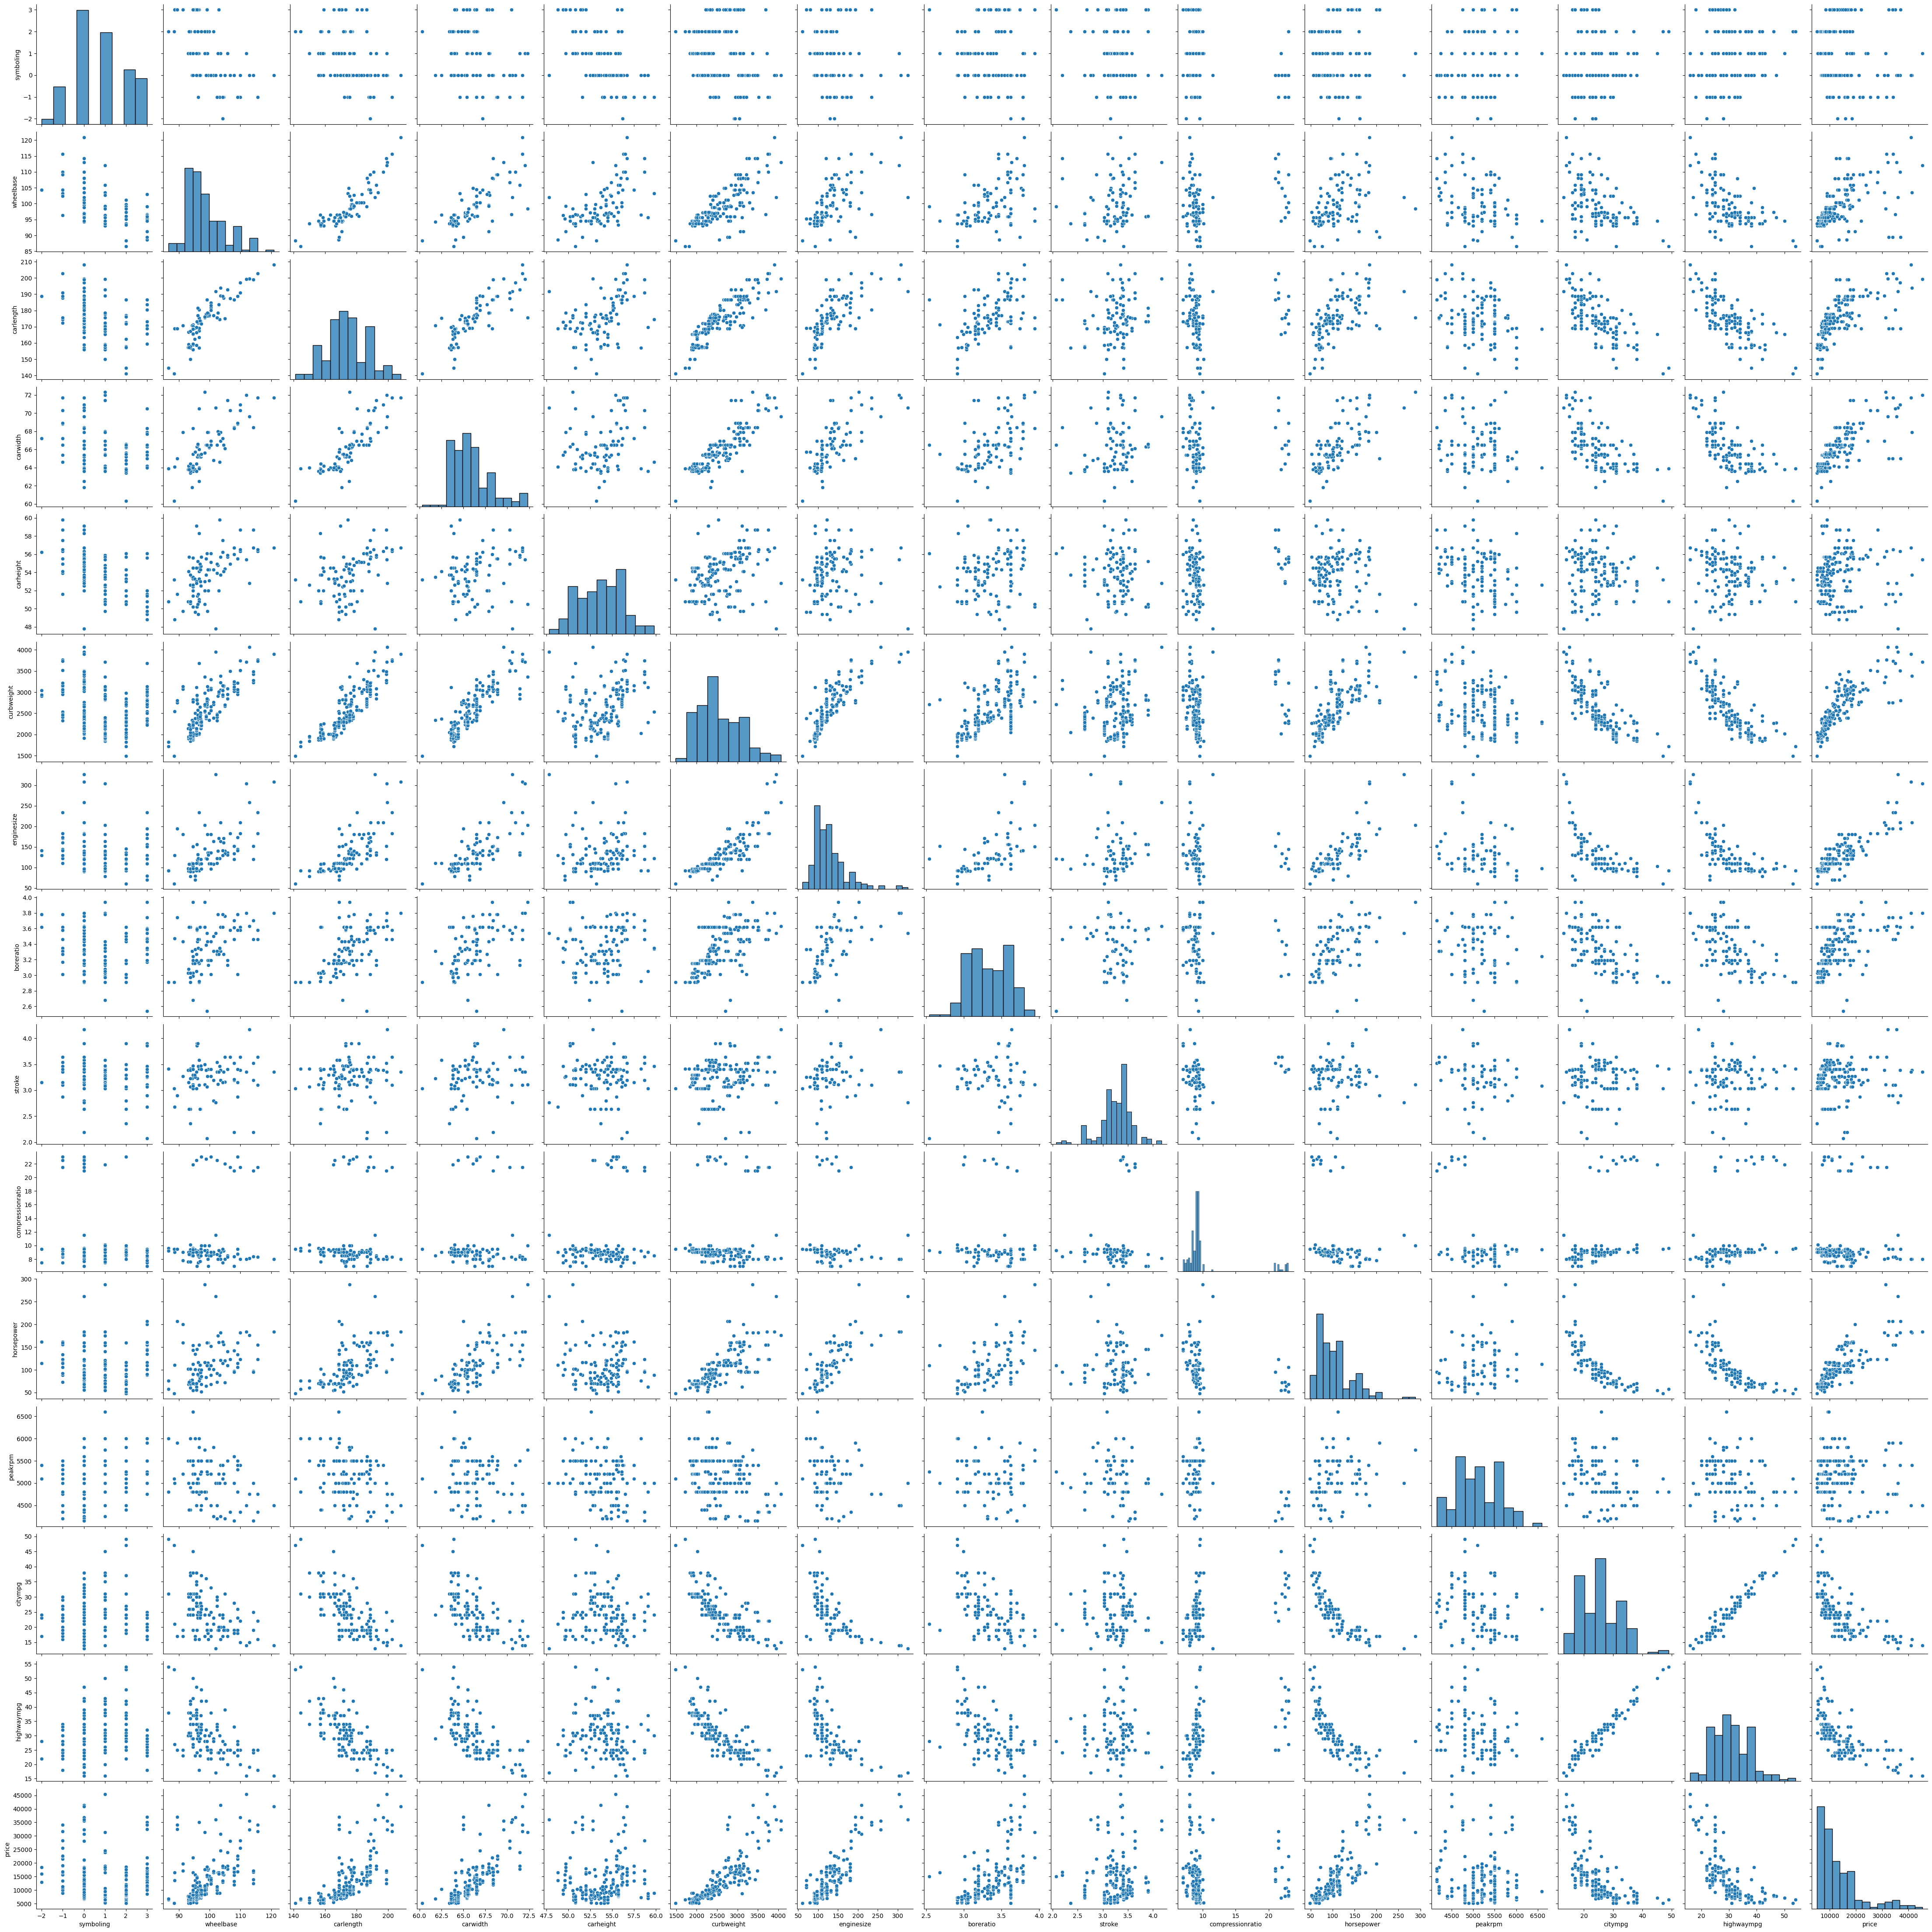

In [557]:
ax=sns.pairplot(df_auto[num_col], height=3)
print(f"Insights: carwidth , carlength, curbweight ,enginesize ,horsepowerseems to have a positive correlation with price.")

### Visualising few more Categorical Variables
Boxplot of all the categorical variables

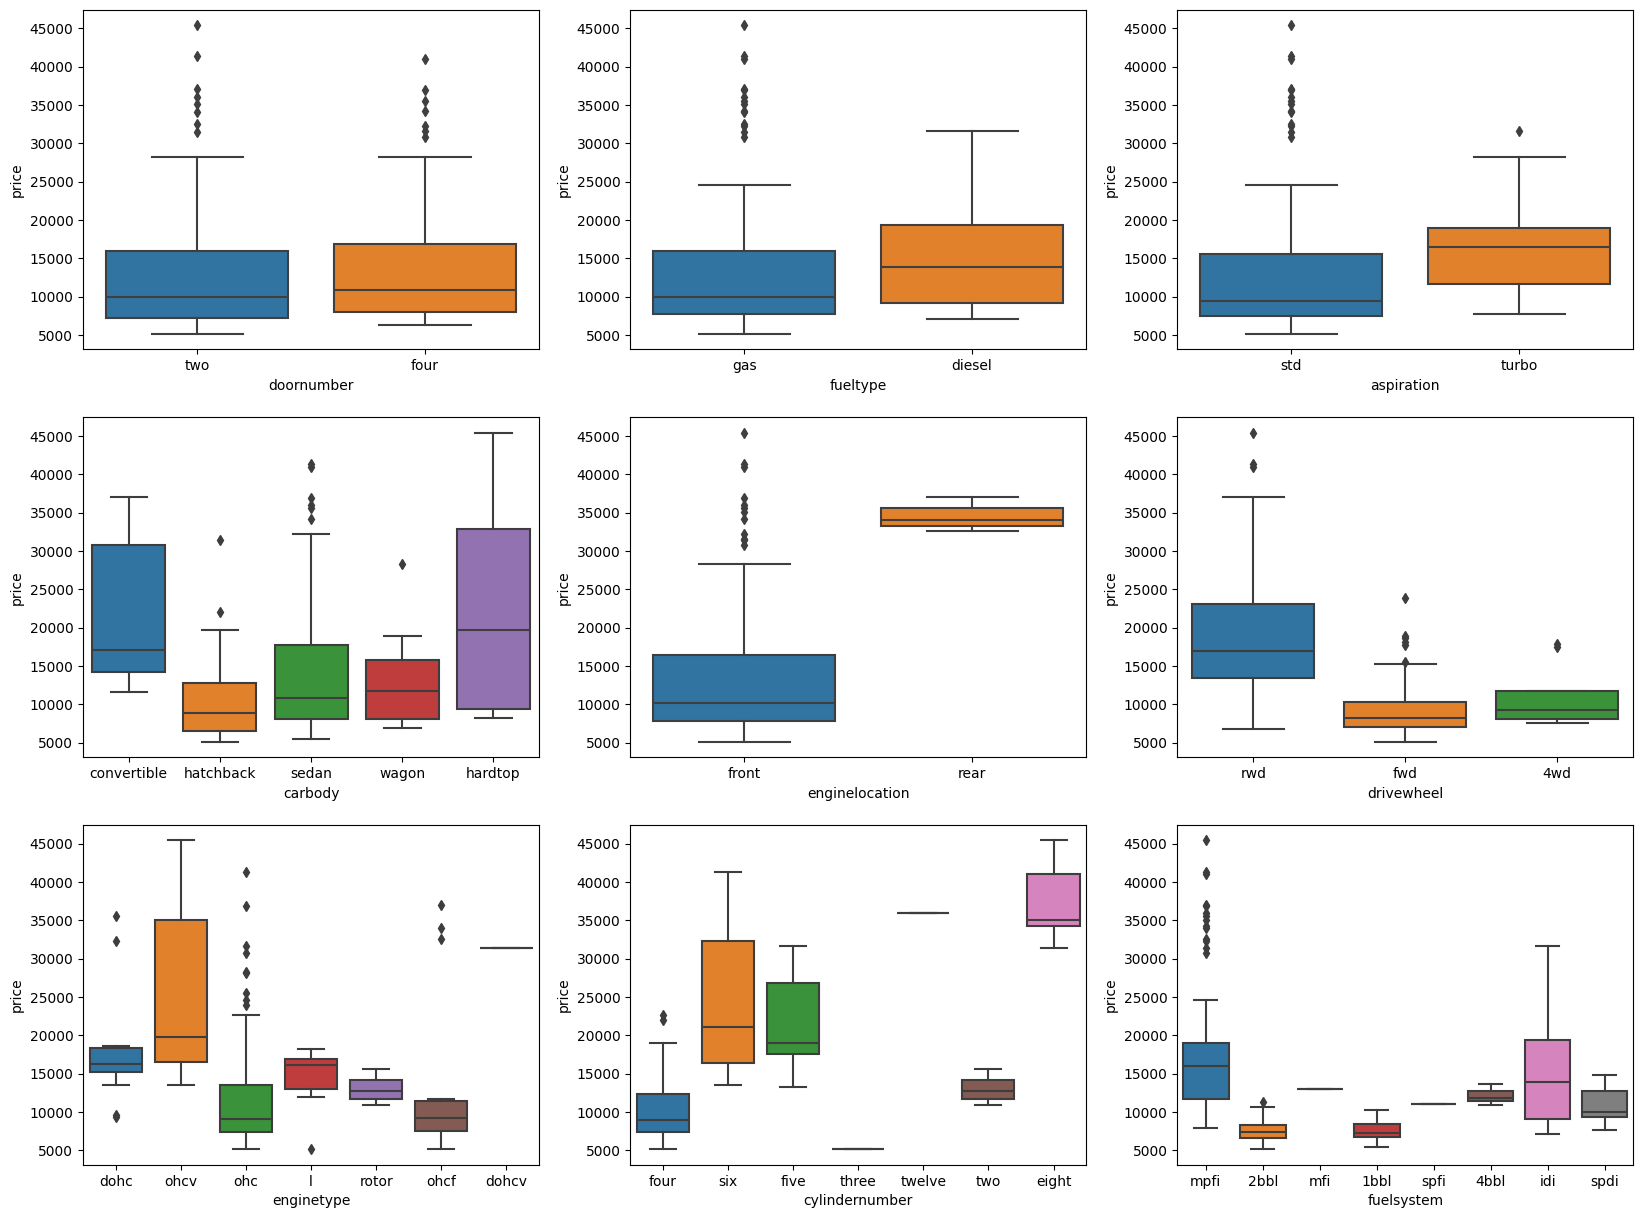

 Insights: 1.Cars fueled by diesel tend to have higher prices compared to those fueled by gas.
 2.Convertible car bodies generally command higher prices compared to other types of car bodies.
 3.Vehicles with rear engine placement are notably more expensive than those with front engine placement.
 4. In many cases, the price of a car correlates positively with the number of cylinders it possesses.


In [558]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = df_auto)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = df_auto)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = df_auto)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = df_auto)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = df_auto)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = df_auto)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = df_auto)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df_auto)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df_auto)
plt.show()

print(f" Insights: 1.Cars fueled by diesel tend to have higher prices compared to those fueled by gas.\n 2.Convertible car bodies generally command higher prices compared to other types of car bodies.\n 3.Vehicles with rear engine placement are notably more expensive than those with front engine placement.\n 4. In many cases, the price of a car correlates positively with the number of cylinders it possesses.")

In [559]:
#Binning the Car Companies based on avg prices of each car Company.

df_auto['price'] = df_auto['price'].astype('int')
df_auto_temp = df_auto.copy()
t = df_auto_temp.groupby(['CarName'])['price'].mean()
df_auto_temp = df_auto_temp.merge(t.reset_index(), how='left',on='CarName')
bins = [0,10000,20000,40000]
label =['Budget_Friendly','Medium_Range','TopNotch_Cars']
df_auto['Cars_Category'] = pd.cut(df_auto_temp['price_y'],bins,right=False,labels=label)
df_auto.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Cars_Category
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Medium_Range
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Medium_Range
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Medium_Range
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Medium_Range
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Medium_Range


### Significant variables after Visualization¶
Cars_Category , Engine Type, Fuel Type
Car Body , Aspiration , Cylinder Number
Drivewheel , Curbweight , Car Length
Car Length , Car width , Engine Size
Boreratio , Horse Power , Wheel base
citympg , highwaympg , symboling

In [560]:
sig_col = ['price','Cars_Category','enginetype','fueltype', 'aspiration','carbody','cylindernumber', 'drivewheel',
            'wheelbase','curbweight', 'enginesize', 'boreratio','horsepower', 
                    'citympg','highwaympg', 'carlength','carwidth']

In [561]:
df_auto = df_auto[sig_col]
df_auto

,price,Cars_Category,enginetype,fueltype,aspiration,carbody,cylindernumber,drivewheel,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth
0,13495,Medium_Range,dohc,gas,std,convertible,four,rwd,88.6,2548,130,3.47,111,21,27,168.8,64.1
1,16500,Medium_Range,dohc,gas,std,convertible,four,rwd,88.6,2548,130,3.47,111,21,27,168.8,64.1
2,16500,Medium_Range,ohcv,gas,std,hatchback,six,rwd,94.5,2823,152,2.68,154,19,26,171.2,65.5
3,13950,Medium_Range,ohc,gas,std,sedan,four,fwd,99.8,2337,109,3.19,102,24,30,176.6,66.2
4,17450,Medium_Range,ohc,gas,std,sedan,five,4wd,99.4,2824,136,3.19,115,18,22,176.6,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845,Medium_Range,ohc,gas,std,sedan,four,rwd,109.1,2952,141,3.78,114,23,28,188.8,68.9
201,19045,Medium_Range,ohc,gas,turbo,sedan,four,rwd,109.1,3049,141,3.78,160,19,25,188.8,68.8
202,21485,Medium_Range,ohcv,gas,std,sedan,six,rwd,109.1,3012,173,3.58,134,18,23,188.8,68.9
203,22470,Medium_Range,ohc,diesel,turbo,sedan,six,rwd,109.1,3217,145,3.01,106,26,27,188.8,68.9


### 3.4 Step 4 - Data Prepration

#### Dummy Variables
The variable carbody has five levels. 
We have converted these levels into integer. 
Similarly we had to convert the categorical variables to numeric.

In [562]:
sig_cat_col = ['Cars_Category','fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber']

In [563]:
# Get the dummy variables for the categorical feature and store it in a new variable

dummies = pd.get_dummies(df_auto[sig_cat_col])
dummies.shape

(205, 29)

In [564]:
dummies

,Cars_Category_Budget_Friendly,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,False,True,False,False,True,True,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,True,False,False,True,True,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
2,False,True,False,False,True,True,False,False,False,True,...,False,True,False,False,False,False,True,False,False,False
3,False,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,False,True,False,False,True,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
201,False,True,False,False,True,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
202,False,True,False,False,True,True,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
203,False,True,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [565]:
dummies = pd.get_dummies(df_auto[sig_cat_col], drop_first = True)
dummies.shape

(205, 22)

In [566]:
dummies

,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,True,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,True,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
2,True,False,True,False,False,True,False,False,False,True,...,False,False,True,False,False,False,True,False,False,False
3,True,False,True,False,False,False,True,False,True,False,...,True,False,False,False,False,True,False,False,False,False
4,True,False,True,False,False,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,True,False,True,False,False,False,True,False,False,True,...,True,False,False,False,False,True,False,False,False,False
201,True,False,True,True,False,False,True,False,False,True,...,True,False,False,False,False,True,False,False,False,False
202,True,False,True,False,False,False,True,False,False,True,...,False,False,True,False,False,False,True,False,False,False
203,True,False,False,True,False,False,True,False,False,True,...,True,False,False,False,False,False,True,False,False,False


In [567]:
# Adding the results to the original dataframe

df_auto = pd.concat([df_auto, dummies], axis = 1)
df_auto

,price,Cars_Category,enginetype,fueltype,aspiration,carbody,cylindernumber,drivewheel,wheelbase,curbweight,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,13495,Medium_Range,dohc,gas,std,convertible,four,rwd,88.6,2548,...,False,False,False,False,False,True,False,False,False,False
1,16500,Medium_Range,dohc,gas,std,convertible,four,rwd,88.6,2548,...,False,False,False,False,False,True,False,False,False,False
2,16500,Medium_Range,ohcv,gas,std,hatchback,six,rwd,94.5,2823,...,False,False,True,False,False,False,True,False,False,False
3,13950,Medium_Range,ohc,gas,std,sedan,four,fwd,99.8,2337,...,True,False,False,False,False,True,False,False,False,False
4,17450,Medium_Range,ohc,gas,std,sedan,five,4wd,99.4,2824,...,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845,Medium_Range,ohc,gas,std,sedan,four,rwd,109.1,2952,...,True,False,False,False,False,True,False,False,False,False
201,19045,Medium_Range,ohc,gas,turbo,sedan,four,rwd,109.1,3049,...,True,False,False,False,False,True,False,False,False,False
202,21485,Medium_Range,ohcv,gas,std,sedan,six,rwd,109.1,3012,...,False,False,True,False,False,False,True,False,False,False
203,22470,Medium_Range,ohc,diesel,turbo,sedan,six,rwd,109.1,3217,...,True,False,False,False,False,False,True,False,False,False


In [568]:
# Droping the original cat variables as dummies are already created

df_auto.drop(sig_cat_col, axis = 1, inplace = True)
df_auto.shape

(205, 32)

In [569]:
df_auto

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,13495,88.6,2548,130,3.47,111,21,27,168.8,64.1,...,False,False,False,False,False,True,False,False,False,False
1,16500,88.6,2548,130,3.47,111,21,27,168.8,64.1,...,False,False,False,False,False,True,False,False,False,False
2,16500,94.5,2823,152,2.68,154,19,26,171.2,65.5,...,False,False,True,False,False,False,True,False,False,False
3,13950,99.8,2337,109,3.19,102,24,30,176.6,66.2,...,True,False,False,False,False,True,False,False,False,False
4,17450,99.4,2824,136,3.19,115,18,22,176.6,66.4,...,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845,109.1,2952,141,3.78,114,23,28,188.8,68.9,...,True,False,False,False,False,True,False,False,False,False
201,19045,109.1,3049,141,3.78,160,19,25,188.8,68.8,...,True,False,False,False,False,True,False,False,False,False
202,21485,109.1,3012,173,3.58,134,18,23,188.8,68.9,...,False,False,True,False,False,False,True,False,False,False
203,22470,109.1,3217,145,3.01,106,26,27,188.8,68.9,...,True,False,False,False,False,False,True,False,False,False


### 3.5 Step 5- Split the Data into Training and Test

In [570]:
df_auto = df_auto.astype(int)
df_train , df_test = train_test_split(df_auto,train_size = 0.7 , test_size = 0.3 , random_state = 100)

In [571]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
122,7609,93,2191,98,2,68,31,38,167,63,...,1,0,0,0,0,1,0,0,0,0
125,22018,94,2778,151,3,143,19,27,168,68,...,1,0,0,0,0,1,0,0,0,0
166,9538,94,2300,98,3,112,26,29,168,64,...,0,0,0,0,0,1,0,0,0,0
1,16500,88,2548,130,3,111,21,27,168,64,...,0,0,0,0,0,1,0,0,0,0
199,18950,104,3157,130,3,162,17,22,188,67,...,1,0,0,0,0,1,0,0,0,0


In [572]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
sig_num_col = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']
df_train[sig_num_col] = scaler.fit_transform(df_train[sig_num_col])
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
122,-0.700200,-0.845210,-0.642128,-0.660242,-2.722456,-0.872898,0.839773,1.025419,-0.475162,-1.046959,...,1,0,0,0,0,1,0,0,0,0
125,1.151931,-0.678500,0.439415,0.637806,0.367315,1.021826,-0.957048,-0.557490,-0.394940,1.207787,...,1,0,0,0,0,1,0,0,0,0
166,-0.452246,-0.678500,-0.441296,-0.660242,0.367315,0.238673,0.091098,-0.269688,-0.394940,-0.596010,...,0,0,0,0,0,1,0,0,0,0
1,0.442648,-1.678762,0.015642,0.123485,0.367315,0.213410,-0.657578,-0.557490,-0.394940,-0.596010,...,0,0,0,0,0,1,0,0,0,0
199,0.757571,0.988604,1.137720,0.123485,0.367315,1.501822,-1.256518,-1.276993,1.209504,0.756838,...,1,0,0,0,0,1,0,0,0,0


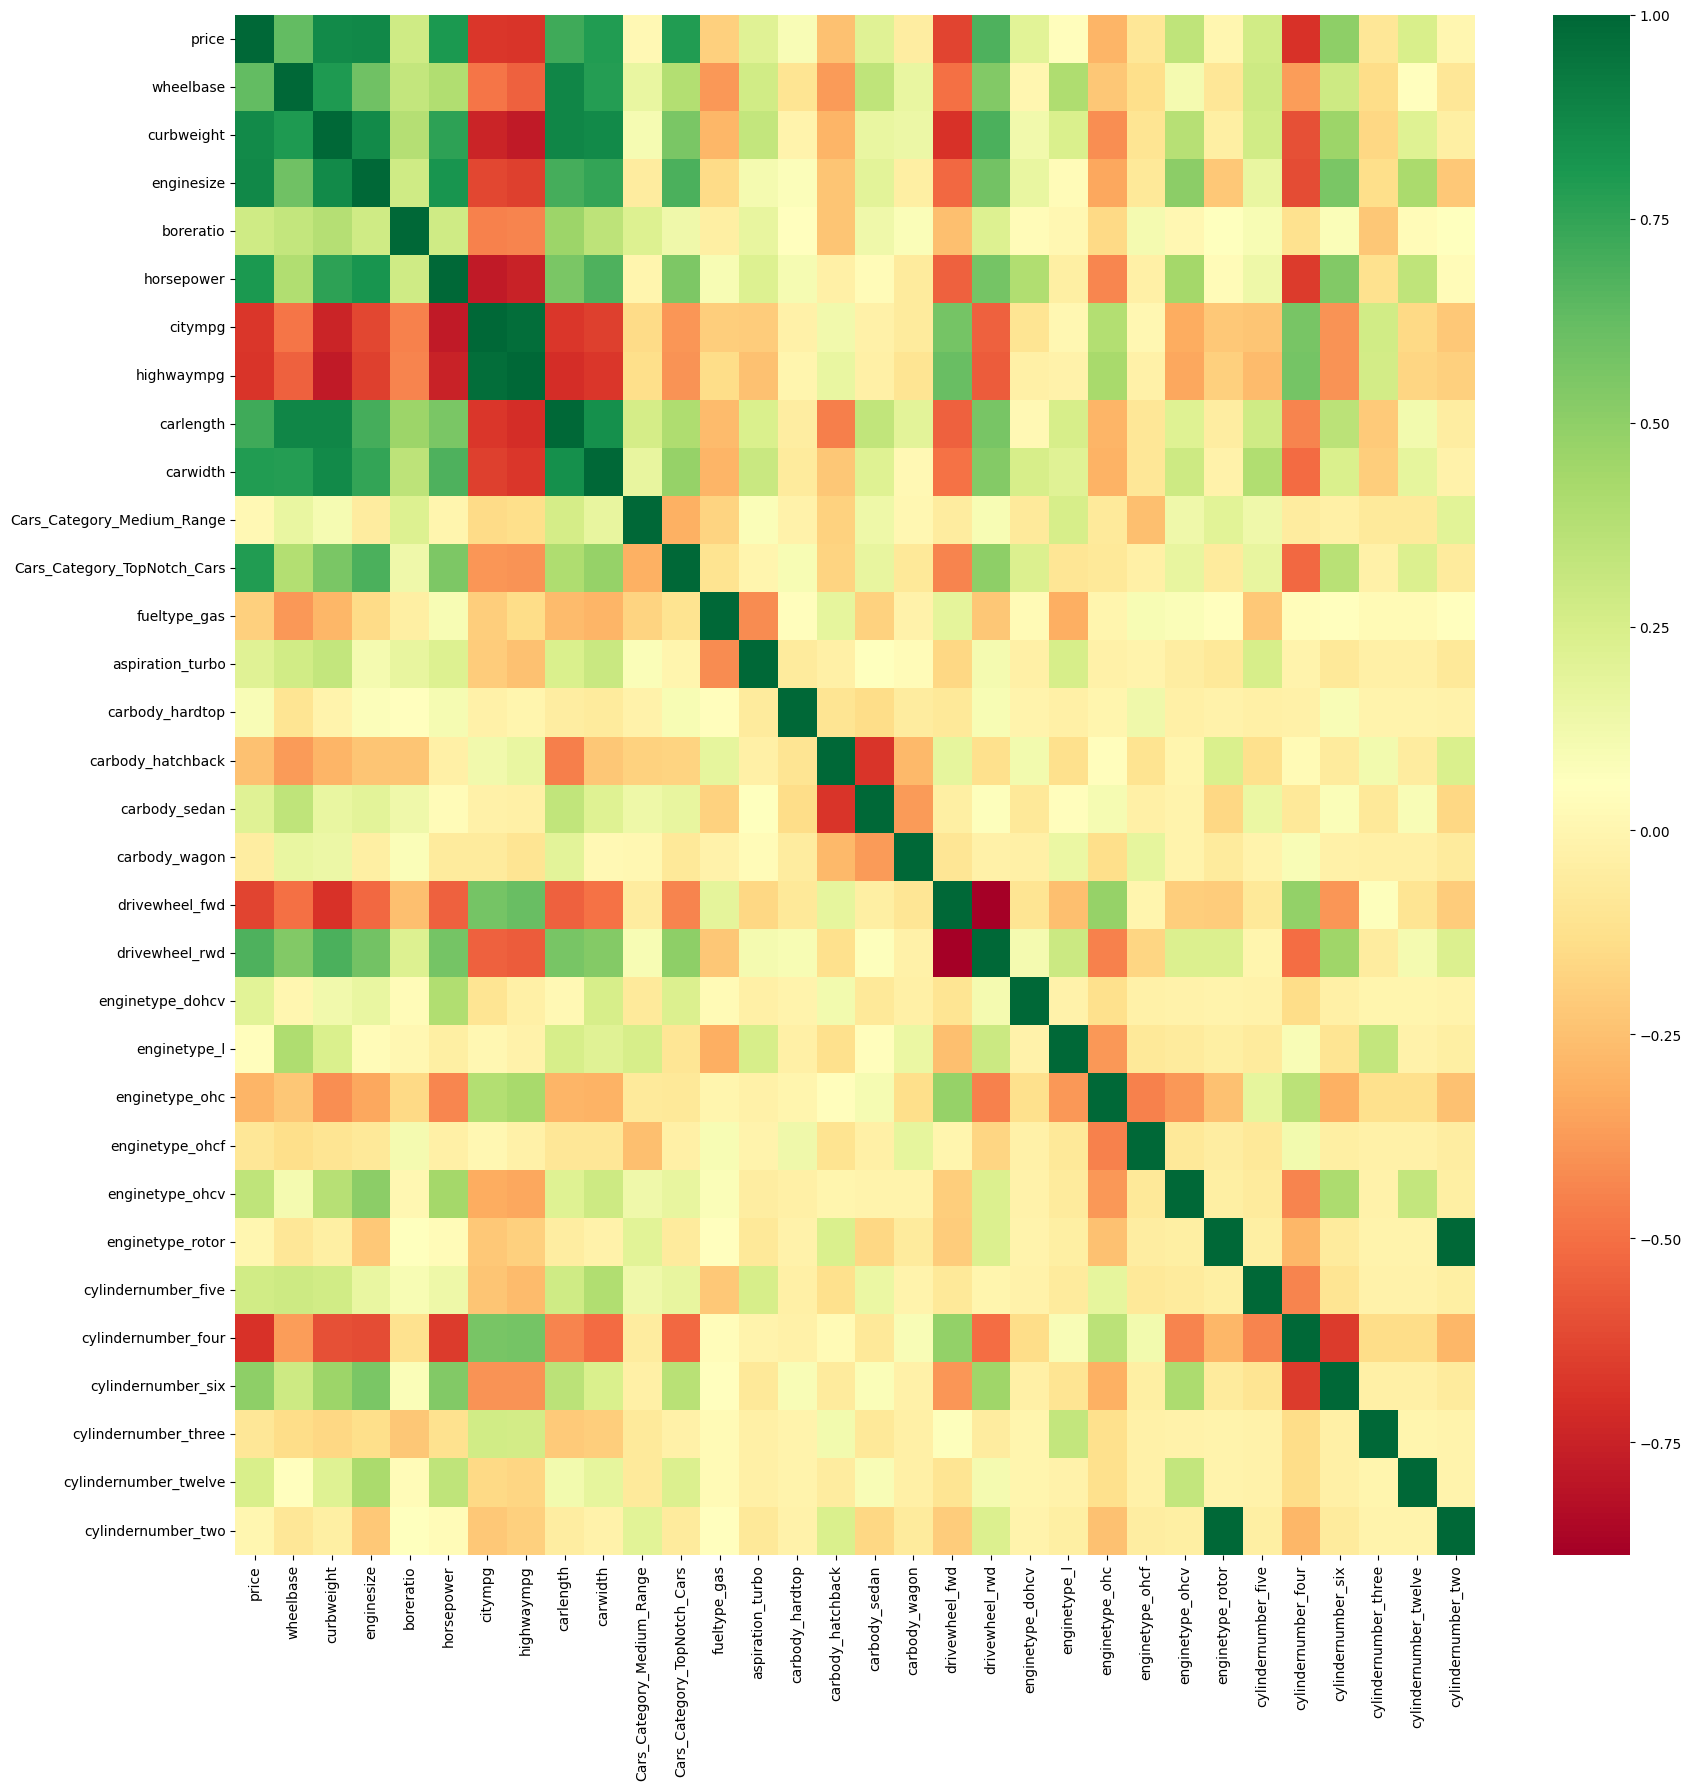

In [573]:
# checking the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), cmap="RdYlGn")
plt.show()

#### Diving into X and Y sets to build a model

In [574]:
x_train = df_train
y_train = df_train.pop('price')

### 3.6 Step - 6 Build a Linear model using RFE and VIF

In [575]:
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)             
rfe = rfe.fit(x_train, y_train)

In [576]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 9),
 ('curbweight', True, 1),
 ('enginesize', False, 12),
 ('boreratio', False, 14),
 ('horsepower', True, 1),
 ('citympg', False, 15),
 ('highwaympg', False, 7),
 ('carlength', False, 10),
 ('carwidth', False, 5),
 ('Cars_Category_Medium_Range', True, 1),
 ('Cars_Category_TopNotch_Cars', True, 1),
 ('fueltype_gas', False, 11),
 ('aspiration_turbo', False, 16),
 ('carbody_hardtop', False, 4),
 ('carbody_hatchback', False, 2),
 ('carbody_sedan', False, 3),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 8),
 ('drivewheel_rwd', False, 17),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 13),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', True, 1),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_three', False, 6),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', True, 1)]

In [577]:
# Columns which are in support 
col_sup = x_train.columns[rfe.support_]
col_sup

Index(['curbweight', 'horsepower', 'Cars_Category_Medium_Range',
       'Cars_Category_TopNotch_Cars', 'carbody_wagon', 'enginetype_dohcv',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [578]:
# Data Frame with rfe selected columns
x_train_rfe = x_train[col_sup]
x_train_rfe

,curbweight,horsepower,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,carbody_wagon,enginetype_dohcv,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two
122,-0.642128,-0.872898,0,0,0,0,1,0,0,0,0,1,0,0,0
125,0.439415,1.021826,0,1,0,0,1,0,0,0,0,1,0,0,0
166,-0.441296,0.238673,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.015642,0.213410,1,0,0,0,0,0,0,0,0,1,0,0,0
199,1.137720,1.501822,1,0,1,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,-0.251520,0.339725,0,0,0,0,1,0,0,0,0,1,0,0,0
103,0.958998,1.249192,1,0,0,0,0,0,1,0,0,0,1,0,0
67,1.797333,0.516566,0,1,0,0,1,0,0,0,1,0,0,0,0
24,-1.054847,-0.872898,0,0,0,0,1,0,0,0,0,1,0,0,0


#### After passing the arbitary selected columns by RFE we have manually evaluated each models p-value and VIF value. We dropped the variables one at a time based on below criteria.

1. High p-value High VIF : Drop the variable

2. High p-value Low VIF or Low p-value High VIF : Drop the variable with high p-value first

3. Low p-value Low VIF : accept the variable

In [579]:
x_train_rfec = sm.add_constant(x_train_rfe)
lm_rfe = sm.OLS(y_train,x_train_rfec).fit()
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     127.2
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           6.66e-68
Time:                        19:33:15   Log-Likelihood:                -9.6779
No. Observations:                 143   AIC:                             49.36
Df Residuals:                     128   BIC:                             93.80
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

#### Checking VIF


In [580]:
# Dataframe with all the feature names and their respective vif values
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,enginetype_rotor,inf
14,cylindernumber_two,inf
6,enginetype_ohc,11.26
11,cylindernumber_four,10.70
1,horsepower,5.18
0,curbweight,4.64
12,cylindernumber_six,2.80
10,cylindernumber_five,2.68
3,Cars_Category_TopNotch_Cars,2.67
2,Cars_Category_Medium_Range,2.59


In [581]:
#Dropping cylindernumber_tweleve beacuse its p-value is 0.066 and we want p-value less than 0.05 and hence rebuilding the model
x_train_rfe1 = x_train_rfe.drop('cylindernumber_twelve', axis=1)
x_train_rfe1c = sm.add_constant(x_train_rfe1)
lm_rfe1 = sm.OLS(y_train, x_train_rfe1c).fit()
print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     134.2
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           3.03e-68
Time:                        19:34:23   Log-Likelihood:                -11.574
No. Observations:                 143   AIC:                             51.15
Df Residuals:                     129   BIC:                             92.63
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### Repeating the Steps

In [582]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe1.values, i) for i in range(x_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,enginetype_rotor,inf
13,cylindernumber_two,inf
6,enginetype_ohc,11.18
11,cylindernumber_four,10.70
0,curbweight,4.59
1,horsepower,4.43
10,cylindernumber_five,2.64
3,Cars_Category_TopNotch_Cars,2.61
2,Cars_Category_Medium_Range,2.59
7,enginetype_ohcf,2.38


In [583]:
#Dropping cylindernumber_two beacuse its p-value is 0.028 and we want p-value less than 0.05 and hence rebuilding the model
x_train_rfe2 = x_train_rfe1.drop('cylindernumber_two', axis=1)
x_train_rfe2c = sm.add_constant(x_train_rfe2)
lm_rfe2 = sm.OLS(y_train, x_train_rfe2c).fit()
print(lm_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     134.2
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           3.03e-68
Time:                        19:35:51   Log-Likelihood:                -11.574
No. Observations:                 143   AIC:                             51.15
Df Residuals:                     129   BIC:                             92.63
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [584]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe2.values, i) for i in range(x_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,enginetype_ohc,11.18
11,cylindernumber_four,10.70
0,curbweight,4.59
1,horsepower,4.43
10,cylindernumber_five,2.64
3,Cars_Category_TopNotch_Cars,2.61
2,Cars_Category_Medium_Range,2.59
7,enginetype_ohcf,2.38
12,cylindernumber_six,2.37
5,enginetype_dohcv,1.53


In [585]:
#Dropping enginetype_rotor beacuse its p-value is 0.o28 and we want p-value less than 0.05 and hence rebuilding the model
x_train_rfe3 = x_train_rfe2.drop('enginetype_rotor', axis=1)
x_train_rfe3c = sm.add_constant(x_train_rfe3)
lm_rfe3 = sm.OLS(y_train, x_train_rfe3c).fit()

print(lm_rfe3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     140.7
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           2.80e-68
Time:                        19:36:26   Log-Likelihood:                -14.270
No. Observations:                 143   AIC:                             54.54
Df Residuals:                     130   BIC:                             93.06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [586]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe3.values, i) for i in range(x_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,enginetype_ohc,11.18
10,cylindernumber_four,10.50
0,curbweight,4.45
1,horsepower,4.36
9,cylindernumber_five,2.61
3,Cars_Category_TopNotch_Cars,2.55
7,enginetype_ohcf,2.38
11,cylindernumber_six,2.34
2,Cars_Category_Medium_Range,2.18
5,enginetype_dohcv,1.52


In [587]:
# Dropping enginetype_ohcv beacuse its p-value is 0.174 with High VIF
x_train_rfe4 = x_train_rfe3.drop(['enginetype_ohcv'], axis=1)
x_train_rfe4c = sm.add_constant(x_train_rfe4)
lm_rfe4 = sm.OLS(y_train, x_train_rfe4c).fit()

print(lm_rfe4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     152.3
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           5.56e-69
Time:                        19:36:56   Log-Likelihood:                -15.289
No. Observations:                 143   AIC:                             54.58
Df Residuals:                     131   BIC:                             90.13
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [588]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe4.values, i) for i in range(x_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,enginetype_ohc,11.07
9,cylindernumber_four,10.44
0,curbweight,4.43
1,horsepower,4.11
8,cylindernumber_five,2.61
3,Cars_Category_TopNotch_Cars,2.54
7,enginetype_ohcf,2.36
10,cylindernumber_six,2.25
2,Cars_Category_Medium_Range,2.09
5,enginetype_dohcv,1.48


In [589]:
# Dropping cylindernumber_six beacuse its p-value is 0.135 
x_train_rfe5 = x_train_rfe4.drop(['cylindernumber_six'], axis=1)
x_train_rfe5c = sm.add_constant(x_train_rfe5)
lm_rfe5 = sm.OLS(y_train, x_train_rfe5c).fit()

print(lm_rfe5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     165.8
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           1.28e-69
Time:                        19:37:25   Log-Likelihood:                -16.514
No. Observations:                 143   AIC:                             55.03
Df Residuals:                     132   BIC:                             87.62
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [590]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe5.values, i) for i in range(x_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,enginetype_ohc,8.84
9,cylindernumber_four,8.59
0,curbweight,4.36
1,horsepower,3.68
3,Cars_Category_TopNotch_Cars,2.53
7,enginetype_ohcf,2.08
8,cylindernumber_five,2.03
2,Cars_Category_Medium_Range,1.89
4,carbody_wagon,1.38
5,enginetype_dohcv,1.38


In [591]:
# Dropping cylindernumber_five beacuse its p-value is 0.377 
x_train_rfe6 = x_train_rfe5.drop(['cylindernumber_five'], axis=1)
x_train_rfe6c = sm.add_constant(x_train_rfe6)
lm_rfe6 = sm.OLS(y_train, x_train_rfe6c).fit()

print(lm_rfe6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     184.4
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           1.35e-70
Time:                        19:38:04   Log-Likelihood:                -16.939
No. Observations:                 143   AIC:                             53.88
Df Residuals:                     133   BIC:                             83.51
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [592]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe6.values, i) for i in range(x_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,cylindernumber_four,5.49
6,enginetype_ohc,5.35
0,curbweight,3.78
1,horsepower,3.52
3,Cars_Category_TopNotch_Cars,2.44
2,Cars_Category_Medium_Range,1.79
7,enginetype_ohcf,1.68
4,carbody_wagon,1.38
5,enginetype_dohcv,1.36


In [593]:
## Dropping enginetype_dohcv beacuse its p-value is 0.152
x_train_rfe7 = x_train_rfe6.drop(['enginetype_dohcv'], axis=1)
x_train_rfe7c = sm.add_constant(x_train_rfe7)
lm_rfe7 = sm.OLS(y_train, x_train_rfe7c).fit()

print(lm_rfe7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     205.5
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           2.55e-71
Time:                        19:38:36   Log-Likelihood:                -18.048
No. Observations:                 143   AIC:                             54.10
Df Residuals:                     134   BIC:                             80.76
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [594]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe7.values, i) for i in range(x_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,cylindernumber_four,5.36
5,enginetype_ohc,5.25
0,curbweight,3.41
1,horsepower,2.79
3,Cars_Category_TopNotch_Cars,2.39
2,Cars_Category_Medium_Range,1.79
6,enginetype_ohcf,1.64
4,carbody_wagon,1.37


In [595]:
## Dropping enginetype_ohcf beacuse its p-value is 0.058
x_train_rfe8 = x_train_rfe7.drop(['enginetype_ohcf'], axis=1)
x_train_rfe8c = sm.add_constant(x_train_rfe8)
lm_rfe8 = sm.OLS(y_train, x_train_rfe8c).fit()

print(lm_rfe8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     229.8
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           9.77e-72
Time:                        19:39:06   Log-Likelihood:                -19.972
No. Observations:                 143   AIC:                             55.94
Df Residuals:                     135   BIC:                             79.65
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [596]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe8.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe8.values, i) for i in range(x_train_rfe8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,enginetype_ohc,3.93
6,cylindernumber_four,3.88
0,curbweight,3.24
1,horsepower,2.76
3,Cars_Category_TopNotch_Cars,2.22
2,Cars_Category_Medium_Range,1.78
4,carbody_wagon,1.31


In [597]:
## Dropping enginetype_ohc because it's p-value is 0.291 
x_train_rfe9 = x_train_rfe8.drop(['enginetype_ohc'], axis=1)
x_train_rfe9c = sm.add_constant(x_train_rfe9)
lm_rfe9 = sm.OLS(y_train, x_train_rfe9c).fit()

print(lm_rfe9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     267.7
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           9.99e-73
Time:                        19:39:31   Log-Likelihood:                -20.566
No. Observations:                 143   AIC:                             55.13
Df Residuals:                     136   BIC:                             75.87
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [598]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe9.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe9.values, i) for i in range(x_train_rfe9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,3.13
1,horsepower,2.73
5,cylindernumber_four,2.30
3,Cars_Category_TopNotch_Cars,1.74
2,Cars_Category_Medium_Range,1.64
4,carbody_wagon,1.30


In [599]:
## Dropping carbody_wagon because it has the highest p-value of 0.19 
x_train_rfe10 = x_train_rfe9.drop(['carbody_wagon'], axis=1)
x_train_rfe10c = sm.add_constant(x_train_rfe10)
lm_rfe10 = sm.OLS(y_train, x_train_rfe10c).fit()

print(lm_rfe10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     309.5
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           8.65e-73
Time:                        19:40:54   Log-Likelihood:                -23.491
No. Observations:                 143   AIC:                             58.98
Df Residuals:                     137   BIC:                             76.76
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [600]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe10.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe10.values, i) for i in range(x_train_rfe10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,2.77
1,horsepower,2.65
4,cylindernumber_four,2.01
3,Cars_Category_TopNotch_Cars,1.72
2,Cars_Category_Medium_Range,1.64


##  Now we have the model with 5 predictor variables

### 3.7 Step-7 Residual Analysis of the Train Data

Text(0.5, 0, 'Errors')

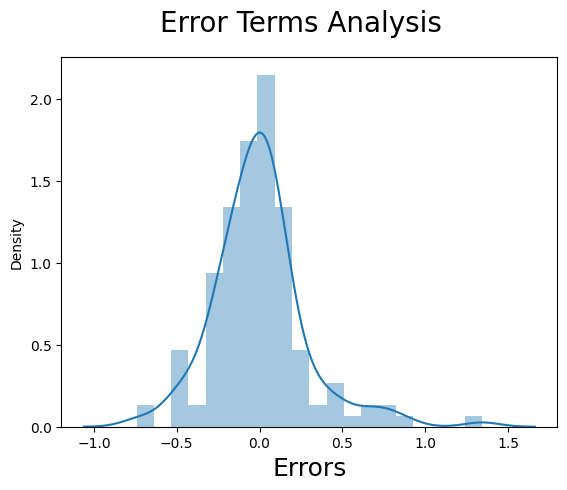

In [601]:
## Predicting the price of training set.
y_train_price = lm_rfe10.predict(x_train_rfe10c)
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

### 3.8 Step-8 Making Predictions Using the Final Model

In [602]:
df_test[sig_num_col] = scaler.transform(df_test[sig_num_col])
df_test.shape

(62, 32)

In [603]:
y_test = df_test.pop('price')
x_test = df_test
x_test_1 = sm.add_constant(x_test)

x_test_new = x_test_1[x_train_rfe10c.columns]

In [604]:
y_pred = lm_rfe10.predict(x_test_new)

### 3.9 Step-9 Model Evaluation

Text(0, 0.5, 'y_pred')

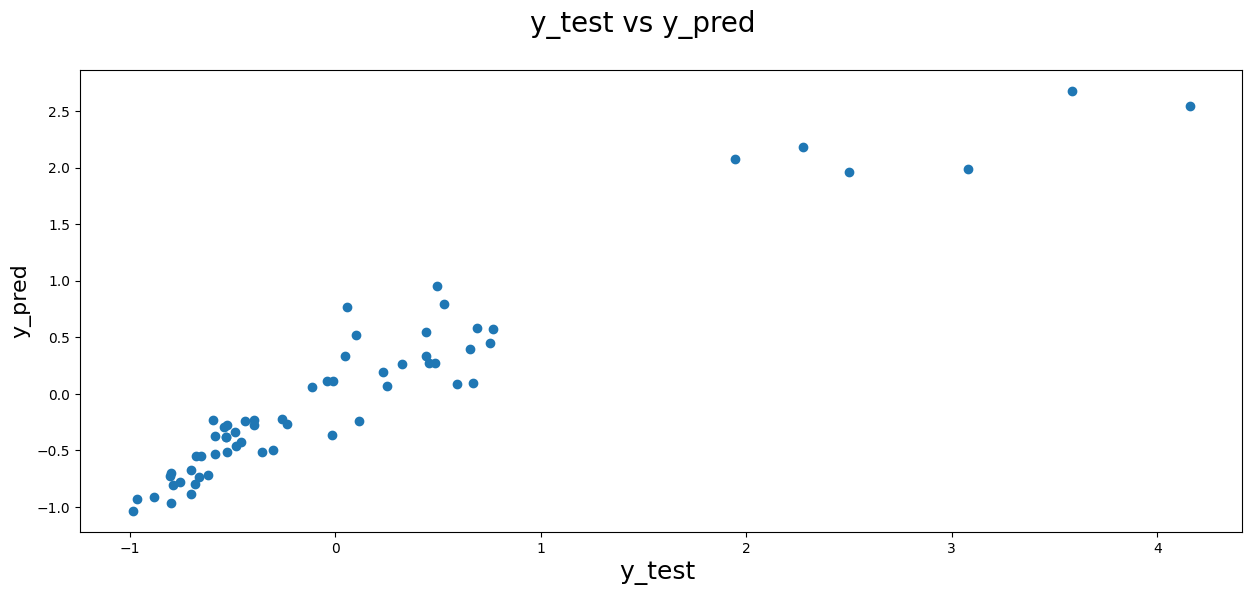

In [605]:
fig = plt.figure(figsize=(15,6))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)   

## RMSE Score 

In [608]:
r2_score(y_test, y_pred)

0.8899591790373174

# The R2 score of Training set is 0.919 and Test set is 0.8899 which is quite close. Hence, We can say that our model is good enough to predict the Car prices using below predictor variables

## 
curbweight

horsepower

cylindernumber_four

Cars_Category_TopNotch_Cars

Cars_Category_Medium_Range

## Equation of Line to predict the Car prices values

### Carprice=-0.1029 +0.3970xcurbweight +0.2005×horsepower -0.2009xcylinder_four +1.3745×Carscategorytopnotchcars −0.2142xcar_category_Medium_Range

# 4. Conclusion

# 
1. R-sqaured and Adjusted R-squared - 0.919 and 0.916 - 90% variance explained.
2. p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the
predictors are statistically significant.